# Homework - Random Walks (18 pts)

## Nisha Dalal nd8288

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Continuous random walk in three dimensions

Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between -1 and 1 along each axis (x, y, z).

1. (3 pts) Create data structure(s) to store your simulated particle positions for each of 2000 time steps and initialize them with the particles starting positions.

In [2]:
numP = 1000
numTS = 2000
positions = np.zeros((numP, 3, numTS))

# starting positions
positions[:,:,0] = np.random.random((numP, 3))

2. (3 pts) Write code to run your simulation for 2000 time steps.

In [3]:
# random move each particle per time step
r_move = np.random.random((numP, 3, numTS))

# convert random moves
r_move *= 2
r_move -= 1

# random walk
for t in range(1, numTS):
    positions[:,:,t] = positions[:,:,t-1] + r_move[:,:,t]

3. (3 pts) Generate a series of four 3D scatter plots at selected time points to visually convey what is going on. Arrange the plots in a single row from left to right. Make sure you indicate which time points you are showing.

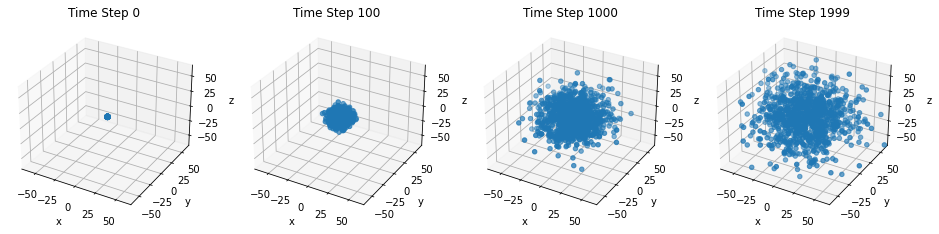

In [4]:
fig = plt.figure(figsize=(16,4))
for i, t in enumerate([0, 100, 1000, 1999]):
    x = positions[:,0,t]
    y = positions[:,1,t]
    z = positions[:,2,t]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Time Step {t}")
    ax.set_xlim([-65, 65])
    ax.set_ylim([-65, 65])
    ax.set_zlim([-65, 65]);

4. (3 pts) Draw the path of a single particle (your choice) across all time steps in a 3D plot.

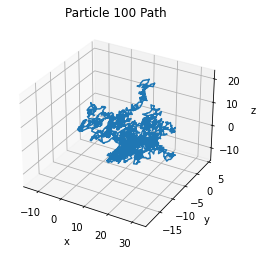

In [5]:
i = 100
x = positions[i,0,:]
y = positions[i,1,:]
z = positions[i,2,:]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Particle {i} Path");

5. (3 pts) Find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. Jump distance is the euclidean distance moved on each time step $\sqrt(dx^2+dy^2+dz^2)$. *Hint: numpy makes this very simple.*

In [6]:
dist_jump = np.sqrt(((positions[:,:,1:] - positions[:,:,:-1])**2).sum(axis=1))

min_dist = dist_jump.min()
max_dist = dist_jump.max()
mean_dist = dist_jump.mean()
jump_dist_var = dist_jump.var()

print(f"Minimum jump distance = {min_dist :.4f}")
print(f"Maximum jump distance = {max_dist :.4f}")
print(f"Mean jump distance = {mean_dist :.4f}")
print(f"Jump distance variance = {jump_dist_var :.4f}")

Minimum jump distance = 0.0085
Maximum jump distance = 1.7289
Mean jump distance = 0.9606
Jump distance variance = 0.0774


6. (3 pts) Repeat the simulation, but this time confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge of the cell, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). Show plots as in #3 to visualize the simulation (note that most interesting stuff liekly happens in the first 100 time steps).

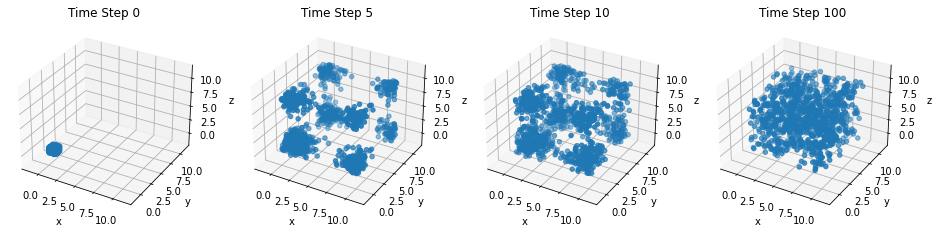

In [7]:
numP = 1000
numTS = 2000
position = np.zeros((numP, 3, numTS))

# starting positions
position[:,:,0] = np.random.random((numP, 3))

# random movement of each particle for each time step
r_move = np.random.random((numP, 3, numTS))
# convert random movements in [0,1] to [-1,1]
r_move *= 2  # [0,2]
r_move -= 1  # [-1,1]

# random walk
for t in range(1, numTS):
    position[:,:,t] = position[:,:,t-1] + r_move[:,:,t]
    for i in range(numP):
        x, y, z = position[i,:,t]
        if x < 0:
            position[i,0,t] += 10
        elif x > 10:
            position[i,0,t] -= 10
        if y < 0:
            position[i,1,t] += 10
        elif y > 10:
            position[i,1,t] -= 10
        if z < 0:
            position[i,2,t] += 10
        elif z > 10:
            position[i,2,t] -= 10
            
            
            
fig = plt.figure(figsize=(16,4))
for i, t in enumerate([0, 5, 10, 100]):
    x = position[:,0,t]
    y = position[:,1,t]
    z = position[:,2,t]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Time Step {t}")
    ax.set_xlim([-2, 12])
    ax.set_ylim([-2, 12])
    ax.set_zlim([-2, 12]);